# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 30
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | My family and I have flown ...
1,✅ Trip Verified | This has been by far the wo...
2,✅ Trip Verified | In Nov 2022 I booked and pa...
3,Not Verified | BA is not treating its premium ...
4,✅ Trip Verified | 24 hours before our departu...


In [ ]:
df.to_csv("BA_reviews.csv")

In [ ]:
data = pd.read_csv('/content/BA_reviews.csv')
data.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | My family and I have flown ...
1,1,✅ Trip Verified | This has been by far the wo...
2,2,✅ Trip Verified | In Nov 2022 I booked and pa...
3,3,Not Verified | BA is not treating its premium ...
4,4,✅ Trip Verified | 24 hours before our departu...


In [ ]:
data.shape

(3000, 2)

In [ ]:
data = data.drop("Unnamed: 0", axis = 1)
data.head()

,reviews
0,✅ Trip Verified | My family and I have flown ...
1,✅ Trip Verified | This has been by far the wo...
2,✅ Trip Verified | In Nov 2022 I booked and pa...
3,Not Verified | BA is not treating its premium ...
4,✅ Trip Verified | 24 hours before our departu...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
import re
data['reviews'] = data['reviews'].apply(lambda x: re.sub(r'^.*\|', '', x))

# Print the updated DataFrame
print(data)

                                                reviews
0       My family and I have flown mostly on British...
1       This has been by far the worst service I hav...
2       In Nov 2022 I booked and paid for a return j...
3      BA is not treating its premium economy passen...
4       24 hours before our departure on BA059 to Ca...
...                                                 ...
2995  My partner and I booked a long weekend break w...
2996  LGW-TFS-LGW seat pitch and comfort were good. ...
2997  First time in reduced leg room Club Europe. Do...
2998  I travel world-wide mostly on business and in ...
2999  I flew from LHR to SIN; the aircraft was a Boe...

[3000 rows x 1 columns]


In [ ]:
data.head()

,reviews
0,My family and I have flown mostly on British...
1,This has been by far the worst service I hav...
2,In Nov 2022 I booked and paid for a return j...
3,BA is not treating its premium economy passen...
4,24 hours before our departure on BA059 to Ca...


In [ ]:
data.reviews = data.reviews.str.lower()

In [ ]:
data.reviews = data.reviews.str.strip()

In [ ]:
data.head()

,reviews
0,my family and i have flown mostly on british a...
1,this has been by far the worst service i have ...
2,in nov 2022 i booked and paid for a return jou...
3,ba is not treating its premium economy passeng...
4,24 hours before our departure on ba059 to cape...


In [ ]:
data['reviews'] = data['reviews'].apply(lambda x: re.sub(r'\d+', '', x))

In [ ]:
data.head()

,reviews
0,my family and i have flown mostly on british a...
1,this has been by far the worst service i have ...
2,in nov i booked and paid for a return journey...
3,ba is not treating its premium economy passeng...
4,hours before our departure on ba to cape town...


In [ ]:
data.isnull().sum()

reviews    0
dtype: int64

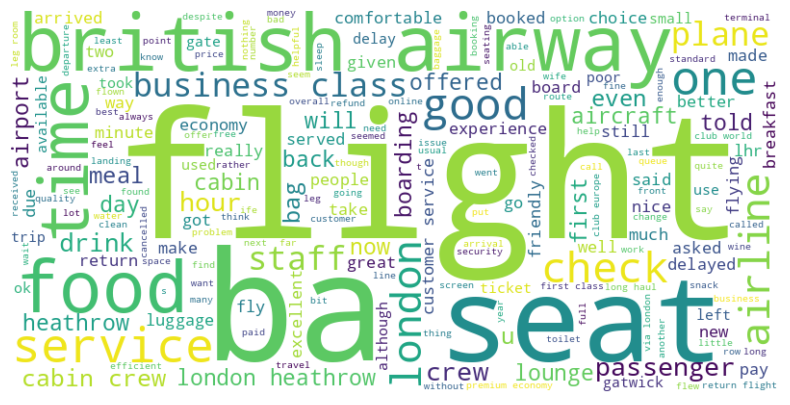

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
all_reviews = ' '.join(data['reviews'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer, WordNetLemmatizer

# **Text Normalisation**

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

 **Tokenization of Text**

In [ ]:
#Tokenization of text
tokenizers = ToktokTokenizer()

# setting English stopwords
stopwords = nltk.corpus.stopwords.words('english')

**Stemming**

In [ ]:
# Stemming the text
def stemmer (text):
    ps = nltk.porter.PorterStemmer()
    text = " ".join([ps.stem(word) for word in text.split()])
    return text

In [ ]:
# apply function on review column
data.reviews = data.reviews.apply(stemmer)
data.reviews.head()

0    my famili and i have flown mostli on british a...
1    thi ha been by far the worst servic i have had...
2    in nov i book and paid for a return journey to...
3    ba is not treat it premium economi passeng wit...
4    hour befor our departur on ba to cape town fro...
Name: reviews, dtype: object

 **Stopword Removal**

In [ ]:
def remove_stopwords(text):
    tokenizers = ToktokTokenizer()
    tokens = tokenizers.tokenize(text)
    filtered_tokens = [i for i in tokens if i.lower() not in stopwords]  # Fix the syntax here
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

data['reviews'] = data['reviews'].apply(remove_stopwords)
data['reviews'].head()

0    famili flown mostli british airway last years....
1    thi ha far worst servic plane. ' veri obviou f...
2    nov book paid return journey new zealand. retu...
3    ba treat premium economi passeng respect. pay ...
4    hour befor departur ba cape town heathrow thur...
Name: reviews, dtype: object

In [ ]:
data.head()

,reviews
0,famili flown mostli british airway last years....
1,thi ha far worst servic plane. ' veri obviou f...
2,nov book paid return journey new zealand. retu...
3,ba treat premium economi passeng respect. pay ...
4,hour befor departur ba cape town heathrow thur...


# **Word Cloud**

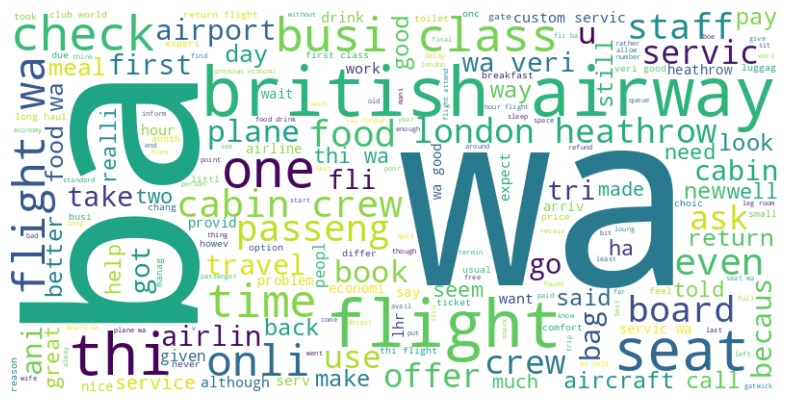

In [ ]:
all_reviews = ' '.join(data['reviews'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **Sentiment Analysis**

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["reviews"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["reviews"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["reviews"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                             reviews  Positive  Negative  \
0  famili flown mostli british airway last years....     0.142     0.043   
1  thi ha far worst servic plane. ' veri obviou f...     0.114     0.056   
2  nov book paid return journey new zealand. retu...     0.099     0.046   
3  ba treat premium economi passeng respect. pay ...     0.250     0.060   
4  hour befor departur ba cape town heathrow thur...     0.042     0.094   

   Neutral  
0    0.815  
1    0.830  
2    0.855  
3    0.690  
4    0.865  


In [ ]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


**Textblob for sentiment Analysis**

In [ ]:
from textblob import TextBlob
data['sentiment'] = data['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Assign sentiment labels based on the sentiment polarity
data['sentiment_label'] = data['sentiment'].apply(lambda score: 'positive' if score > 0 else ('negative'))

# Display the resulting DataFrame
data.head()

,reviews,Positive,Negative,Neutral,sentiment,sentiment_label
0,famili flown mostli british airway last years....,0.142,0.043,0.815,0.059333,positive
1,thi ha far worst servic plane. ' veri obviou f...,0.114,0.056,0.830,-0.008333,negative
2,nov book paid return journey new zealand. retu...,0.099,0.046,0.855,0.148052,positive
3,ba treat premium economi passeng respect. pay ...,0.250,0.060,0.690,-0.016667,negative
4,hour befor departur ba cape town heathrow thur...,0.042,0.094,0.865,-0.108114,negative


In [ ]:
data.sentiment_label.value_counts()

positive    2092
negative     908
Name: sentiment_label, dtype: int64

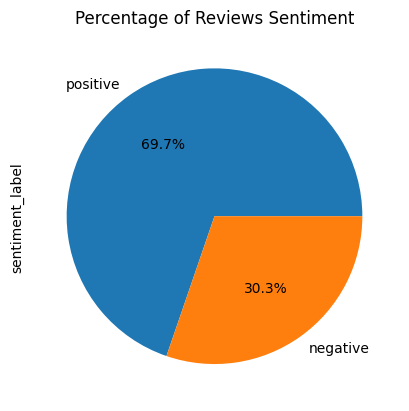

In [ ]:
data.sentiment_label.value_counts().plot(kind = 'pie', autopct='%1.1f%%')
plt.title("Percentage of Reviews Sentiment")
plt.show()

**Lets analys the negative reviews**

In [ ]:
negative_reviews = data[data['sentiment_label'] == 'negative']

In [ ]:
negative_reviews.head()

,reviews,Positive,Negative,Neutral,sentiment,sentiment_label
1,thi ha far worst servic plane. ' veri obviou f...,0.114,0.056,0.830,-0.008333,negative
3,ba treat premium economi passeng respect. pay ...,0.250,0.060,0.690,-0.016667,negative
4,hour befor departur ba cape town heathrow thur...,0.042,0.094,0.865,-0.108114,negative
5,arriv heathrow find flight ibiza wa cancel ba ...,0.000,0.139,0.861,0.000000,negative
9,came glasgow london took connect flight americ...,0.000,0.085,0.915,0.000000,negative


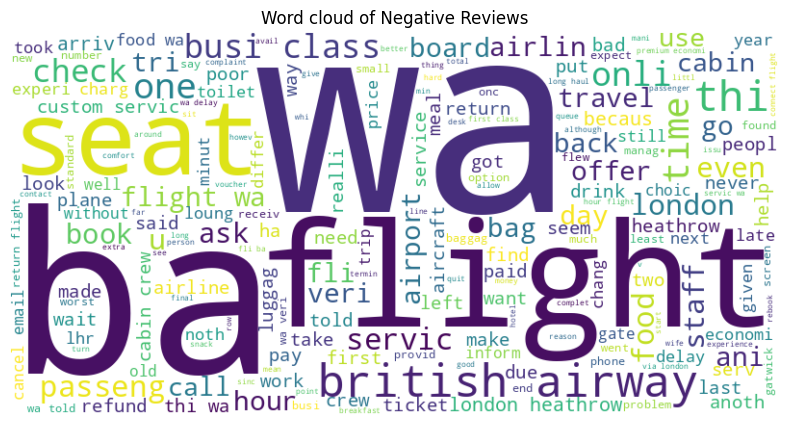

In [ ]:
all_reviews = ' '.join(negative_reviews['reviews'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud of Negative Reviews')
plt.show()